# Telecom Churn Case Study

The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# Problem Statement

### Business problem overview

. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

. For many incumbent operators, retaining high profitable customers is the number one business goal.

. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of churn
. There are various ways to define churn, such as:

### Revenue-based churn:
. Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

### Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

# Objective
- To Predict the customers who are about to churn from a telecom operator
- Business Objective is to predict the High Value Customers only
- We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

### Requirement:

- Churn Prediction Model
- Best Predictor Variables

# Steps to Approach The  Best Solution For This Case Study
There are mainly 6 steps
#### Step 1 :
- Data reading
- Data Understanding
- Data Cleaning
- Imputing missing values 

#### Step-2 :
Need to Filter high value customers

#### Step-3 :
Derive churn
   need to Derive the Target Variable
   
#### Step-4 :
Data Preparation
  - Derived variable
  - EDA
  - Split data in to train and test sets
  - Performing Scaling
 
#### Step-5 :
- Handle class imbalance
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models )

#### Step-6 :
- Model Evaluation
- Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

Finally we need to give best Summarize to the company 

## Import  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [282]:
#pip install imbalanced-learn

In [136]:
# read data
data= pd.read_csv("train.csv")

In [137]:
data.head().T

,0,1,2,3,4
id,0,1,2,3,4
circle_id,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
aon,1958,710,882,982,647
aug_vbc_3g,0.0,0.0,0.0,0.0,0.0
jul_vbc_3g,0.0,0.0,0.0,0.0,0.0
jun_vbc_3g,0.0,0.0,0.0,0.0,0.0


In [138]:
data['std_og_mou_6'].isna().sum() / data['std_og_mou_6'].isna().count() * 100

3.954342204888641

In [139]:
#look at the last 5 rows
data.tail() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


In [140]:
#check the columns of data
data.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [141]:
#Checking the numerical columns data distribution statistics
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [142]:
#check dataframe for null and datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [143]:
# feature type summary
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [144]:
# Checking for null values
data.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [145]:
# Checking the null value percentage
data.isna().sum()/data.isna().count()*100

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [146]:
# Checking for shape of a data set
data.shape

(69999, 172)

In [147]:
# Checking for the duplicates
data.drop_duplicates(subset=None, inplace=True)
data.shape

(69999, 172)

In [148]:
#check the size of data
data.size

12039828

In [149]:
#check the axes of data
data.axes

[RangeIndex(start=0, stop=69999, step=1),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [150]:
#check the dimensions of data
data.ndim

2

In [151]:
#check the values of data
data.values

array([[0, 109, 0.0, ..., 0.0, 0.0, 0],
       [1, 109, 0.0, ..., 0.0, 0.0, 0],
       [2, 109, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [69996, 109, 0.0, ..., 0.0, 0.0, 0],
       [69997, 109, 0.0, ..., 1402.96, 990.97, 0],
       [69998, 109, 0.0, ..., 0.0, 0.0, 0]], dtype=object)

In [152]:
#list of columns
pd.DataFrame(data.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
167,aon
168,aug_vbc_3g
169,jul_vbc_3g
170,jun_vbc_3g


In [153]:
# look at missing value ratio in each column
data.isnull().sum() * 100 / data.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

In [154]:
(data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).head(64)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
                              ...    
std_ic_t2m_mou_6             3.954342
std_ic_t2t_mou_6             3.954342
loc_ic_t2m_mou_6             3.954342
ic_others_6                  3.954342
loc_ic_mou_6                 3.954342
Length: 64, dtype: float64

# Data Cleaning

- Clean or impute missing values.
- Remove duplicate records if necessary.
- Correct any data inconsistencies or errors.

In [155]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [156]:
# data is highly skewed so we will use median for missing fill na values for float and int
for feature in data.columns:
    if data[feature].dtypes != 'object':
        skewness = data[feature].skew()
        print(f"Skewness of '{feature}': {skewness}")

Skewness of 'id': 0.0
Skewness of 'circle_id': 0.0
Skewness of 'loc_og_t2o_mou': 0.0
Skewness of 'std_og_t2o_mou': 0.0
Skewness of 'loc_ic_t2o_mou': 0.0
Skewness of 'arpu_6': 13.700342827550731
Skewness of 'arpu_7': 20.271332375021498
Skewness of 'arpu_8': 19.045774106299618
Skewness of 'onnet_mou_6': 6.140530275668938
Skewness of 'onnet_mou_7': 6.593318250440481
Skewness of 'onnet_mou_8': 7.149100724253364
Skewness of 'offnet_mou_6': 4.933533409292347
Skewness of 'offnet_mou_7': 5.057605910264967
Skewness of 'offnet_mou_8': 6.18421020710315
Skewness of 'roam_ic_mou_6': 16.844320569249692
Skewness of 'roam_ic_mou_7': 27.37308248050083
Skewness of 'roam_ic_mou_8': 25.776788404336997
Skewness of 'roam_og_mou_6': 14.083542921789734
Skewness of 'roam_og_mou_7': 14.273037874007164
Skewness of 'roam_og_mou_8': 23.746728104370458
Skewness of 'loc_og_t2t_mou_6': 13.933248096467356
Skewness of 'loc_og_t2t_mou_7': 15.390717559782741
Skewness of 'loc_og_t2t_mou_8': 19.932183892858017
Skewness of 

#### Handle Outliers

In [187]:
def col_clip(col):
    mean = col.mean()
    std = col.std()
    return col.clip(mean - 2 * std, mean + 2 * std)


In [188]:
def handle_outliers (data):
    df_numerical_variables = data.select_dtypes(include=['int64', 'float64'])
    df_numerical_variables.info()
    # Apply the capping to the numerical columns
    # Let us cap the values
    df_numerical_variables = df_numerical_variables.apply(col_clip, axis=0)
    data[df_numerical_variables.columns] = df_numerical_variables;
    return data

In [189]:
from datetime import datetime

def calculate_latest_charge_date(date_6, date_7, date_8):
    # Function to check if a date string is valid
    def is_valid_date(date_str):
        try:
            datetime.strptime(date_str, '%m/%d/%Y')
            return True
        except ValueError:
            return False

    # Check conditions and calculate months_since_last_charge
    if date_8 and not pd.isna(date_8) and is_valid_date(date_8):
        months_since_last_charge = 0
    elif date_7 and not pd.isna(date_7) and is_valid_date(date_7):
        months_since_last_charge = 1
    elif date_6 and not pd.isna(date_6) and is_valid_date(date_6):
        months_since_last_charge = 2
    else:
        months_since_last_charge = 3
    return months_since_last_charge



# Function to calculate months_since_last_charge
def calculate_months_since_last_charge_df(row):
    return calculate_latest_charge_date(row['date_of_last_rech_6'], row['date_of_last_rech_7'], row['date_of_last_rech_8'])


In [190]:
def prepare_data (data):

    # Keep only those columns that have lt or eq 40% missing values
    data_filtered = data.loc[:, data.isnull().mean() <= 0.4]
    
    # Compute the months_since_last_recharge column and drop the corresponding date fields
    last_recharge_fields = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
    last_recharge_df = data_filtered[last_recharge_fields]
    data_filtered['months_since_last_charge'] = last_recharge_df.apply(calculate_months_since_last_charge_df, axis=1)
    data_filtered.drop(last_recharge_fields, axis=1, inplace=True)


    numerical_cols = data_filtered.select_dtypes(include='number').columns
    categorical_cols = data_filtered.select_dtypes(include='object').columns

    # Initialize SimpleImputer - median for numeric, mode for categorical
    median_imputer = SimpleImputer(strategy='median')
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data_filtered[numerical_cols] = median_imputer.fit_transform(data_filtered[numerical_cols])
    # Do we really need to impute here?  We are dropping it below anyway
    data_filtered[categorical_cols] = mode_imputer.fit_transform(data_filtered[categorical_cols])
    
    # remove duplicates if any
    data_filtered.drop_duplicates()

    # Drop fields with unique values
    data_filtered = data_filtered.loc[:, data_filtered.nunique() > 1]
    
    return data_filtered

In [216]:
# read data
data = pd.read_csv("train.csv")

In [217]:
# Handle Outliers
# Remove id & churn_probability fields
data_without_outliers = handle_outliers(data.drop(['id','churn_probability'], axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 161 entries, circle_id to jun_vbc_3g
dtypes: float64(135), int64(26)
memory usage: 86.0 MB


In [218]:
data[data_without_outliers.columns] = data_without_outliers

<Axes: >

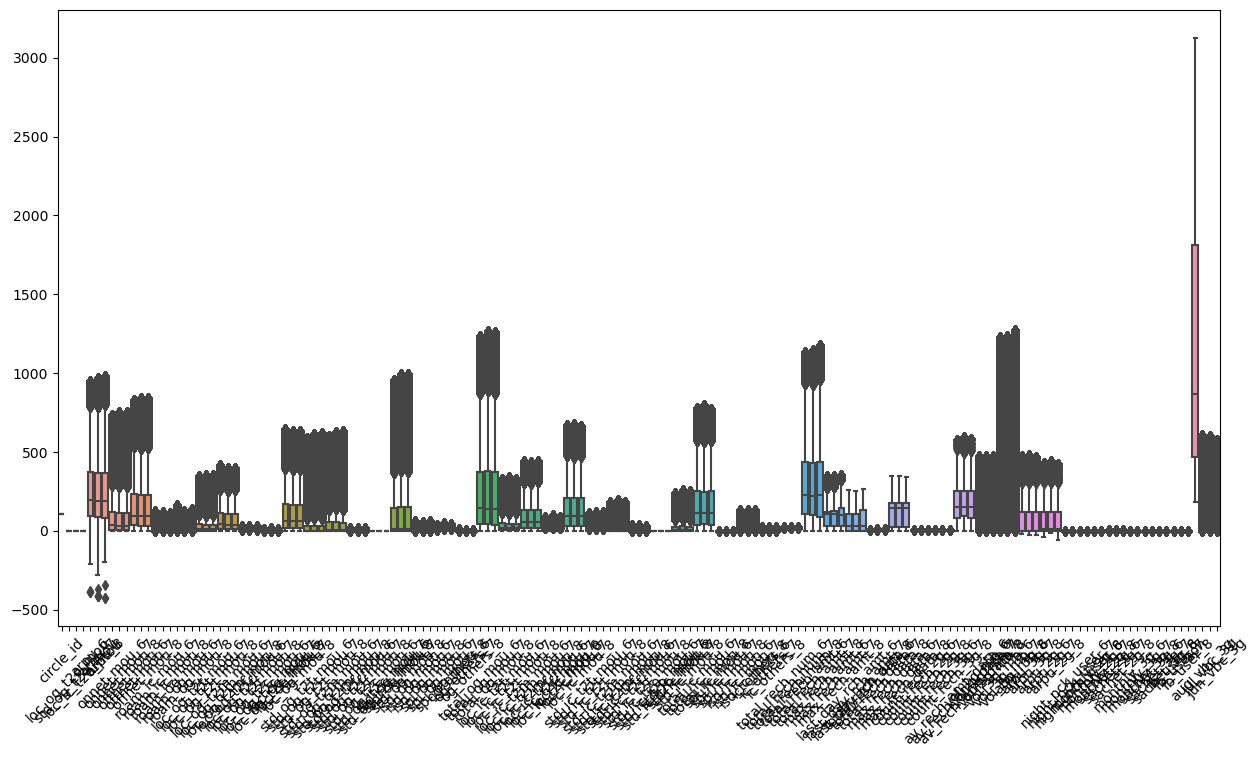

In [219]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data.select_dtypes(include=['int64', 'float64']).drop(['id', 'churn_probability'], axis=1))

In [220]:
filtered_df = prepare_data(data)

In [221]:
filtered_df.shape

(69999, 127)

In [222]:
def display_data(train):
    print("Shape",train.shape)
    pd.set_option('display.max_rows', 200)
    missing_info=pd.concat([train.dtypes, train.nunique(), train.isnull().sum() / len(train) * 100 ], axis=1)
    missing_info.columns=['Data_Types', 'nunique','Missing_Values']
    print("_"*100)
    
    print(missing_info)

In [223]:
filtered_df.head(n=2).T

,0,1
id,0.000,1.000
arpu_6,31.277,0.000
arpu_7,87.009,122.787
arpu_8,7.527,42.953
onnet_mou_6,48.580,0.000
...,...,...
aug_vbc_3g,0.000,0.000
jul_vbc_3g,0.000,0.000
jun_vbc_3g,0.000,0.000
churn_probability,0.000,0.000


# Step 4:
# Data preparation

# 1. EDA

Text(0.5, 1.0, 'Features Correlating with Churn variable')

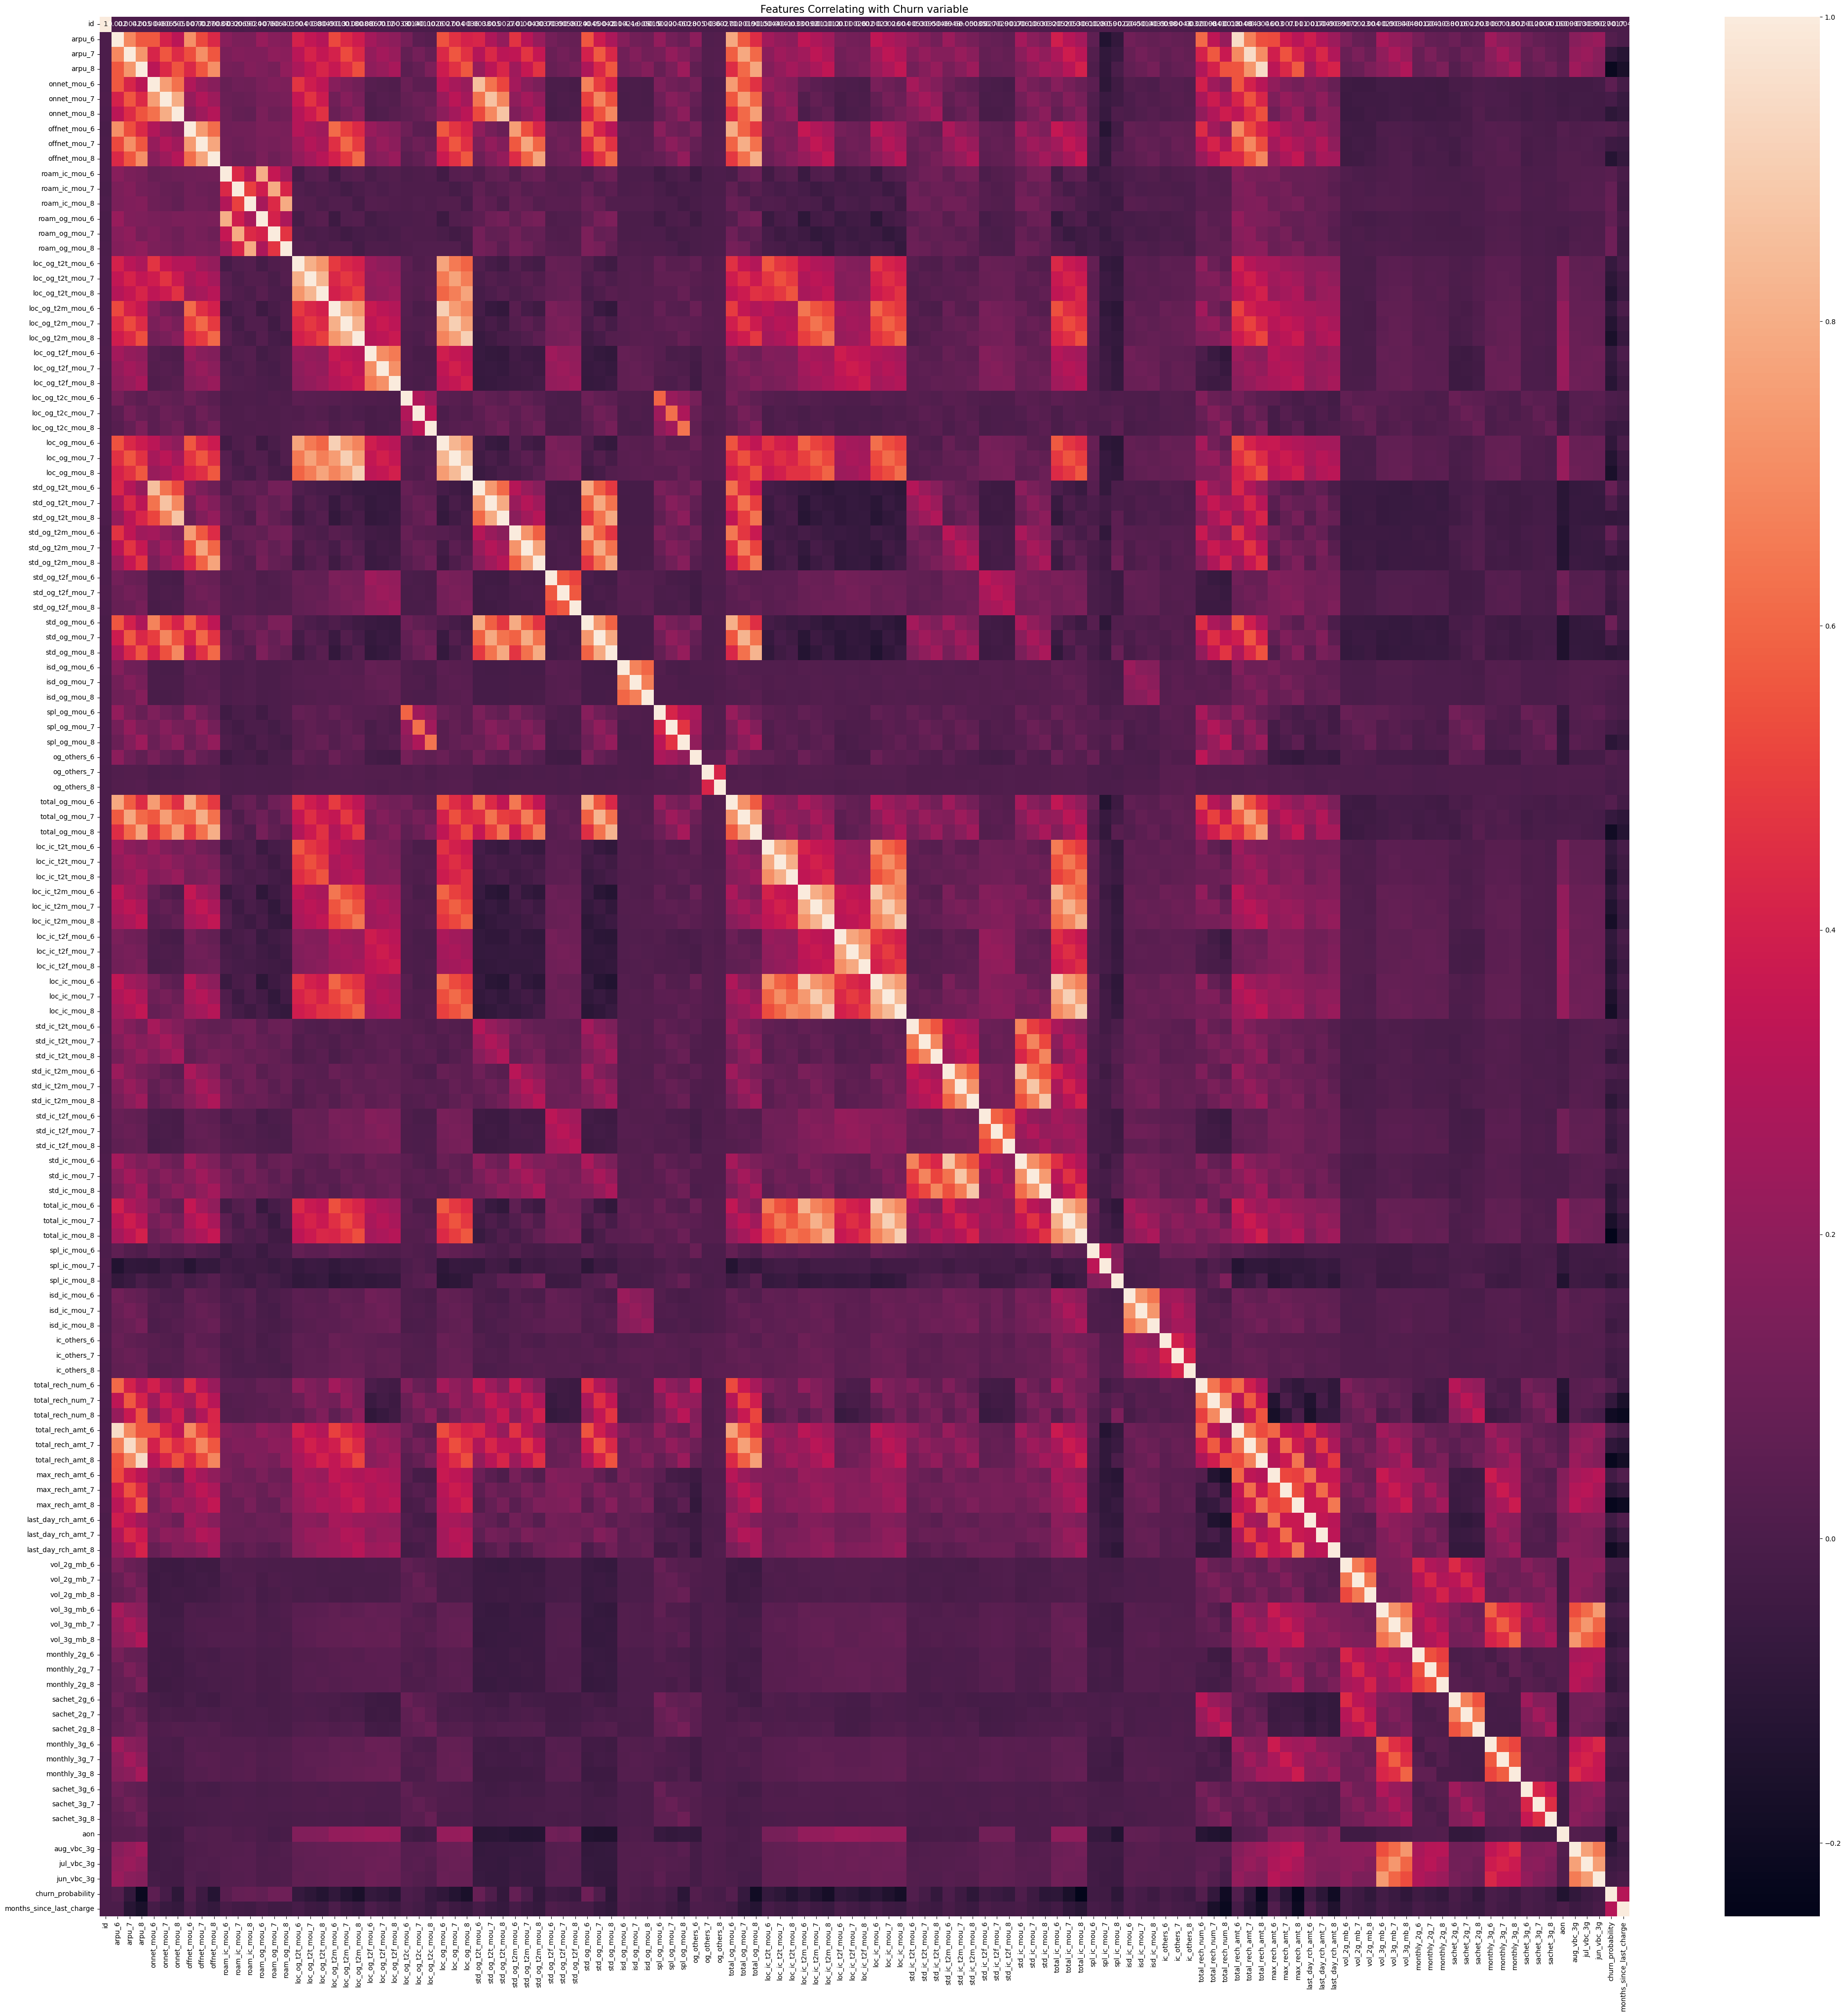

In [224]:
# Checking Correlation between target variable(Churn Probability) with the other variable in the dataset
plt.figure(figsize=(50,50))
heatmap_churn = sns.heatmap(filtered_df.corr(),annot=True)
# heatmap_churn = sns.heatmap(filtered_df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
#                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

Text(0.5, 1.0, 'Features Correlating with Churn variable')

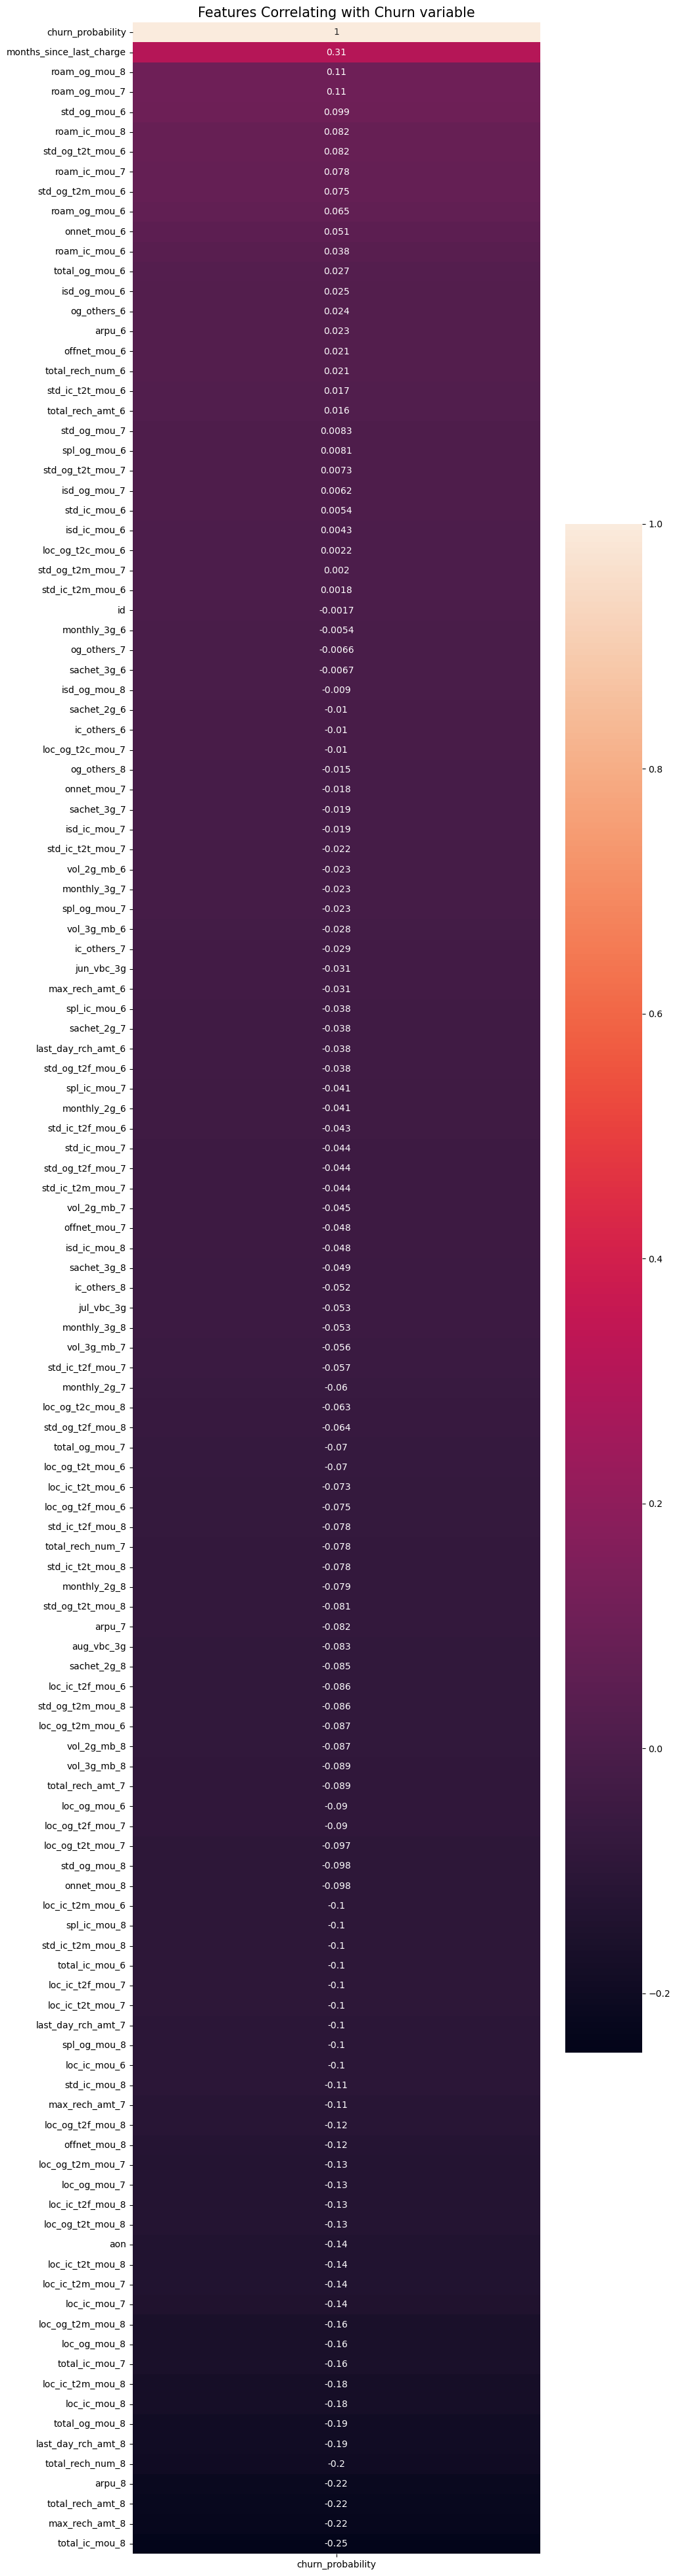

In [225]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(filtered_df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True)
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

As can be seen from the heatmaps, the following observations stand out:

1. Any recharge or usage values (mou, amt) for the month 8 are very relevant.  They -ve influence the churn probability.
2. months_since_last_charge is also important. It is +ve correlated to the churn probability
3. Avg Outgoing Calls & calls on roaming for 6th & 7th months are positively correlated with churn.

In [226]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
# [Action]
filtered_df['tenure'] = (filtered_df['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
# filtered_df.drop('aon',axis=1, inplace=True)

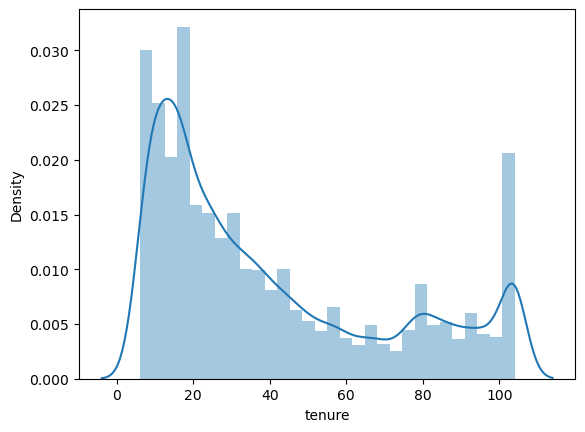

In [227]:
# Checking the distribution of he tenure variable

sns.distplot(filtered_df['tenure'],bins=30)
plt.show()

In [228]:
# [Action]
# [HB] tenure_range is created and then dropped later.  Then do really need it?
# [HB] Is it just for analysis
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
filtered_df['tenure_range'] = pd.cut(filtered_df['tenure'], tn_range, labels=tn_label)
filtered_df['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

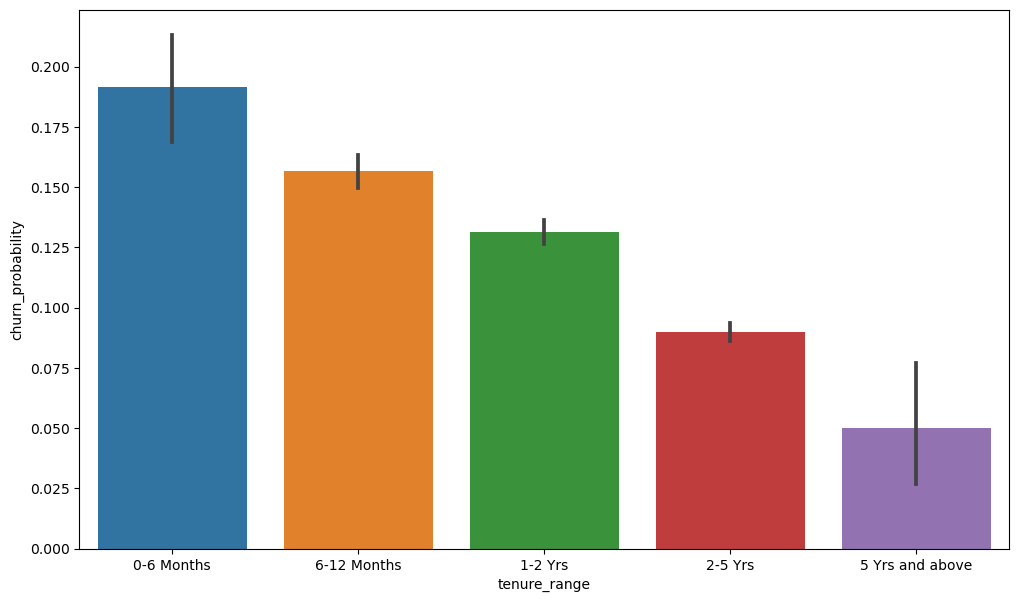

In [229]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=filtered_df )
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [230]:
# [Action]
filtered_df["avg_arpu_6_7"]= (filtered_df['arpu_6']+filtered_df['arpu_7'])/2
filtered_df['avg_arpu_6_7'].head()

0     59.1430
1     61.3935
2     81.9910
3    180.8110
4    184.4495
Name: avg_arpu_6_7, dtype: float64

In [231]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

#filtered_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)




In [232]:
# The curent dimension of the dataset after dropping few unwanted columns
filtered_df.shape

(69999, 128)

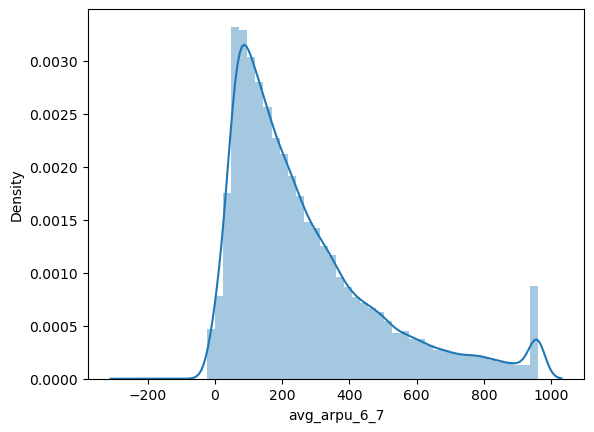

In [233]:
# Visualizing the column created
sns.distplot(filtered_df['avg_arpu_6_7'])
plt.show()

In [234]:
filtered_df.columns

Index(['id', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability', 'months_since_last_charge', 'tenure',
       'tenure_range', 'avg_arpu_6_7'],
      dtype='object', length=128)

In [235]:
# [Analysis]
data_rate = (sum(filtered_df["churn_probability"])/len(filtered_df["churn_probability"].index))*100
data_rate

10.188716981671167

In [236]:
# Drop the tenure field that we created.
filtered_df.drop(['tenure','avg_arpu_6_7','tenure_range'], axis=1, inplace=True)

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection


In [237]:
# divide data into train and test
X = filtered_df.drop("churn_probability", axis = 1)
y = filtered_df.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [238]:
X_train.isna().any()

id                          False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
                            ...  
aon                         False
aug_vbc_3g                  False
jul_vbc_3g                  False
jun_vbc_3g                  False
months_since_last_charge    False
Length: 124, dtype: bool

In [239]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [240]:
import numpy as np
print(np.isnan(X_train).any())  # Check for NaN values in X_train


id                          False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
                            ...  
aon                         False
aug_vbc_3g                  False
jul_vbc_3g                  False
jun_vbc_3g                  False
months_since_last_charge    False
Length: 124, dtype: bool


In [241]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (100586, 124)
Dimension of y_train_sm Shape: (100586,)


In [242]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100586
Model:                            GLM   Df Residuals:                   100461
Model Family:                Binomial   Df Model:                          124
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33590.
Date:                Tue, 13 Feb 2024   Deviance:                       67181.
Time:                        21:56:01   Pearson chi2:                 4.36e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5125
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.2941      0.039     33.509      0.000       1.218       1.370
id                        3.776e-07   4.84e-07      0.781      0.435    -5.7e-07    1.33e-06
arpu_8                       0.0011      0.000      5.360      0.000       0.001       0.001
onnet_mou_6                 -0.0001      0.000     -0.358      0.720      -0.001       0.001
onnet_mou_7                  0.0014      0.000      3.077      0.002       0.001       0.002
onnet_mou_8                 -0.0004      0.000     -0.922      0.357      -0.001       0.001
offnet_mou_6                 0.0009      0.000      3.010      0.003       0.000       0.002
offnet_mou_7                 0.0026      0.000      7.373      0.000       0.002       0.003
offnet_mou_8                -0.0011      0.000     -2.872      0.004      -0.002      -0.000
roam_ic_mou_6               -0.0003      0.001     -0.406      0.684      -0.002       0.001
roam_ic_mou_7                0.0069      0.001      7.016      0.000       0.005       0.009
roam_ic_mou_8               -0.0002      0.001     -0.247      0.805      -0.002       0.002
roam_og_mou_6                0.0023      0.001      3.554      0.000       0.001       0.004
roam_og_mou_7               -0.0012      0.001     -1.589      0.112      -0.003       0.000
roam_og_mou_8                0.0160      0.001     21.608      0.000       0.015       0.017
loc_og_t2t_mou_6            -0.0023      0.001     -2.547      0.011      -0.004      -0.001
loc_og_t2t_mou_7             0.0035      0.001      3.445      0.001       0.001       0.005
loc_og_t2t_mou_8            -0.0116      0.001     -9.806      0.000      -0.014      -0.009
loc_og_t2m_mou_6            -0.0038      0.001     -4.801      0.000      -0.005      -0.002
loc_og_t2m_mou_7             0.0002      0.001      0.258      0.796      -0.002       0.002
loc_og_t2m_mou_8            -0.0083      0.001     -8.100      0.000      -0.010      -0.006
loc_og_t2f_mou_6            -0.0168      0.003     -5.079      0.000      -0.023      -0.010
loc_og_t2f_mou_7             0.0094      0.003      2.739      0.006       0.003       0.016
loc_og_t2f_mou_8            -0.0048      0.004     -1.247      0.212      -0.012       0.003
loc_og_t2c_mou_6            -0.0141      0.006     -2.407      0.016      -0.026      -0.003
loc_og_t2c_mou_7             0.0104      0.005      2.123      0.034       0.001       0.020
loc_og_t2c_mou_8             0.0198      0.006      3.593      0.000       0.009       0.031
loc_og_mou_6                 0.0041      0.001      5.418      0.000       0.003       0.006
loc_og_mou_7                -0.0021      0.001     -2.389      0.017      -0.004      -0.000
loc_og_mou_8                 0.0109      0.001     10.858      0.000       0.009       0.013
std_og_t2t_mou

In [243]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [244]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True])

In [245]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'sachet_2g_8',
       'months_since_last_charge'],
      dtype='object')


In [246]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('id', False, 88),
 ('arpu_8', False, 59),
 ('onnet_mou_6', False, 75),
 ('onnet_mou_7', False, 72),
 ('onnet_mou_8', False, 64),
 ('offnet_mou_6', False, 66),
 ('offnet_mou_7', False, 83),
 ('offnet_mou_8', False, 68),
 ('roam_ic_mou_6', False, 71),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 82),
 ('roam_og_mou_6', False, 21),
 ('roam_og_mou_7', False, 48),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 41),
 ('loc_og_t2t_mou_7', False, 63),
 ('loc_og_t2t_mou_8', False, 4),
 ('loc_og_t2m_mou_6', False, 37),
 ('loc_og_t2m_mou_7', False, 61),
 ('loc_og_t2m_mou_8', False, 5),
 ('loc_og_t2f_mou_6', False, 7),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', False, 12),
 ('loc_og_t2c_mou_6', False, 98),
 ('loc_og_t2c_mou_7', False, 11),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 26),
 ('loc_og_mou_7', False, 57),
 ('loc_og_mou_8', False, 6),
 ('std_og_t2t_mou_6', False, 60),
 ('std_og_t2t_mou_7', False, 67),
 ('std_og_t2t_mou_8', False, 31),
 (

In [247]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100586
Model:                            GLM   Df Residuals:                   100565
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37177.
Date:                Tue, 13 Feb 2024   Deviance:                       74353.
Time:                        21:59:10   Pearson chi2:                 3.84e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4764
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4032      0.020     20.089      0.000       0.364       0.442
roam_og_mou_8                0.0233      0.000     58.032      0.000       0.022       0.024
loc_og_t2c_mou_8             0.0031      0.004      0.781      0.435      -0.005       0.011
std_og_t2f_mou_6            -0.0259      0.005     -4.891      0.000      -0.036      -0.015
std_og_t2f_mou_8            -0.0310      0.007     -4.548      0.000      -0.044      -0.018
isd_og_mou_8                 0.0271      0.003      8.586      0.000       0.021       0.033
loc_ic_t2t_mou_8            -0.0213      0.001    -28.214      0.000      -0.023      -0.020
loc_ic_t2m_mou_8            -0.0226      0.001    -35.256      0.000      -0.024      -0.021
loc_ic_t2f_mou_8            -0.0406      0.001    -27.468      0.000      -0.043      -0.038
loc_ic_mou_8                 0.0449      0.001     69.315      0.000       0.044       0.046
std_ic_t2f_mou_8            -0.0409      0.004     -9.899      0.000      -0.049      -0.033
std_ic_mou_8                 0.0312      0.001     59.054      0.000       0.030       0.032
total_ic_mou_8              -0.0321      0.000    -76.627      0.000      -0.033      -0.031
isd_ic_mou_8                 0.0416      0.001     48.104      0.000       0.040       0.043
ic_others_8                  0.0180      0.006      3.043      0.002       0.006       0.030
total_rech_num_6             0.0310      0.002     13.865      0.000       0.027       0.035
total_rech_num_7             0.0720      0.003     26.311      0.000       0.067       0.077
total_rech_num_8            -0.1369      0.003    -45.333      0.000      -0.143      -0.131
last_day_rch_amt_8          -0.0101      0.000    -52.484      0.000      -0.010      -0.010
sachet_2g_8                 -0.3357      0.016    -20.758      0.000      -0.367      -0.304
months_since_last_charge     0.8622      0.047     18.473      0.000       0.771       0.954
============================================================================================
"""

In [248]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)


In [249]:
y_train_sm_pred = y_train_sm_pred.map(lambda x: 1 if x > 0.5 else 0)

In [250]:
print(classification_report(y_train_sm, y_train_sm_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     50293
         1.0       0.86      0.86      0.86     50293

    accuracy                           0.86    100586
   macro avg       0.86      0.86      0.86    100586
weighted avg       0.86      0.86      0.86    100586



In [251]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm, y_train_sm_pred)
print(confusion)

[[43110  7183]
 [ 6899 43394]]


In [252]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,loc_ic_mou_8,62.69
6,loc_ic_t2m_mou_8,27.60
11,total_ic_mou_8,22.73
5,loc_ic_t2t_mou_8,7.76
15,total_rech_num_7,5.77
16,total_rech_num_8,4.63
14,total_rech_num_6,3.93
10,std_ic_mou_8,3.01
7,loc_ic_t2f_mou_8,2.13
17,last_day_rch_amt_8,1.58


In [254]:
X_train_SM = X_train_SM.drop('loc_ic_mou_8', axis=1)
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:               100586
Model:                            GLM   Df Residuals:                   100566
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38646.
Date:                Tue, 13 Feb 2024   Deviance:                       77292.
Time:                        22:00:36   Pearson chi2:                 9.67e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4609
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.4745      0.020     23.985      0.000       0.436       0.513
roam_og_mou_8                0.0231      0.000     57.751      0.000       0.022       0.024
loc_og_t2c_mou_8            -0.0015      0.004     -0.397      0.691      -0.009       0.006
std_og_t2f_mou_6            -0.0268      0.005     -5.174      0.000      -0.037      -0.017
std_og_t2f_mou_8            -0.0375      0.007     -5.512      0.000      -0.051      -0.024
isd_og_mou_8                 0.0257      0.003      8.070      0.000       0.019       0.032
loc_ic_t2t_mou_8             0.0264      0.001     48.274      0.000       0.025       0.027
loc_ic_t2m_mou_8             0.0247      0.000     55.457      0.000       0.024       0.026
loc_ic_t2f_mou_8             0.0098      0.001      6.964      0.000       0.007       0.013
std_ic_t2f_mou_8            -0.0436      0.004    -10.535      0.000      -0.052      -0.035
std_ic_mou_8                 0.0332      0.001     61.604      0.000       0.032       0.034
total_ic_mou_8              -0.0337      0.000    -78.471      0.000      -0.035      -0.033
isd_ic_mou_8                 0.0433      0.001     49.287      0.000       0.042       0.045
ic_others_8                  0.0174      0.006      2.941      0.003       0.006       0.029
total_rech_num_6             0.0335      0.002     15.275      0.000       0.029       0.038
total_rech_num_7             0.0677      0.003     25.093      0.000       0.062       0.073
total_rech_num_8            -0.1440      0.003    -47.862      0.000      -0.150      -0.138
last_day_rch_amt_8          -0.0102      0.000    -54.244      0.000      -0.011      -0.010
sachet_2g_8                 -0.3334      0.016    -20.826      0.000      -0.365      -0.302
months_since_last_charge     1.0528      0.046     23.107      0.000       0.964       1.142
============================================================================================
"""

In [255]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)

In [256]:
y_train_sm_pred = y_train_sm_pred.map(lambda x: 1 if x > 0.5 else 0)

In [257]:
print(classification_report(y_train_sm, y_train_sm_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     50293
         1.0       0.85      0.86      0.86     50293

    accuracy                           0.86    100586
   macro avg       0.86      0.86      0.86    100586
weighted avg       0.86      0.86      0.86    100586



In [258]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm, y_train_sm_pred)
print(confusion)

[[42646  7647]
 [ 6867 43426]]


In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_SM.columns
vif['VIF'] = [variance_inflation_factor(X_train_SM.values, i) for i in range(X_train_SM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_ic_mou_8,14.30
7,loc_ic_t2m_mou_8,5.50
0,const,5.27
6,loc_ic_t2t_mou_8,2.69
10,std_ic_mou_8,2.38
15,total_rech_num_7,2.29
16,total_rech_num_8,2.23
8,loc_ic_t2f_mou_8,1.51
14,total_rech_num_6,1.50
12,isd_ic_mou_8,1.47


## Note:

Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~90%
. Test Accuracy : ~88%

#### Logistic regression with PCA

. Train Accuracy : ~92%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~94%
. Test Accuracy : ~93%


#### Random Forest with PCA:
. Train Accuracy :~ 92%
. Test Accuracy :~ 92%

# v.Split Data Into Train and Test Data

In [260]:
# divide data into train and test
filtered_df.drop('id', axis=1, inplace=True)
X = filtered_df.drop("churn_probability", axis = 1)
y = filtered_df.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [261]:
print(filtered_df.shape)
print(X.shape)
print(y.shape)

(69999, 124)
(69999, 123)
(69999,)


# vi.Perform Scaling

In [262]:
# Standard Scaler
#Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('LR', LogisticRegression(random_state=1))])
# descion tree
pipe_dt =Pipeline([('scl', StandardScaler()),
                   ('DT', DecisionTreeClassifier(random_state=1))])
# Random Forest
pipe_rf = Pipeline ([
    ('scl', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=1))
])

pipe_rf_with_pca = Pipeline ([
    ('scl', StandardScaler()),
    ('pca', IncrementalPCA(n_components=20)),
    ('RF', RandomForestClassifier(random_state=1))
])


# K Nearest Neighbour
pipe_knn =Pipeline([('scl', StandardScaler()),
                   ('KNN', KNeighborsClassifier())])
# XGB
pipe_xgb =Pipeline([('scl', StandardScaler()),
                   ('XGB', XGBClassifier(random_state=1))])

# FIT Model 

## Logistic Regression

In [263]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])

In [264]:
# print("Logistic Regression Model")
# print(lr_grid_search.score(x_test, y_test)*100)
# print("+"*100)
# print(lr_grid_search.score(x_train, y_train)*100)
# print(lr_grid_search.best_params_)

print("Logistic Regression Model")
print("Train=>",pipe_lr.score(X_train, y_train)*100)
print("Test=>",pipe_lr.score(X_test, y_test)*100)
print("+"*100)
print(pipe_lr)


Logistic Regression Model
Train=> 93.17320329911047
Test=> 93.02857142857142
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])


<Axes: ylabel='Feature'>

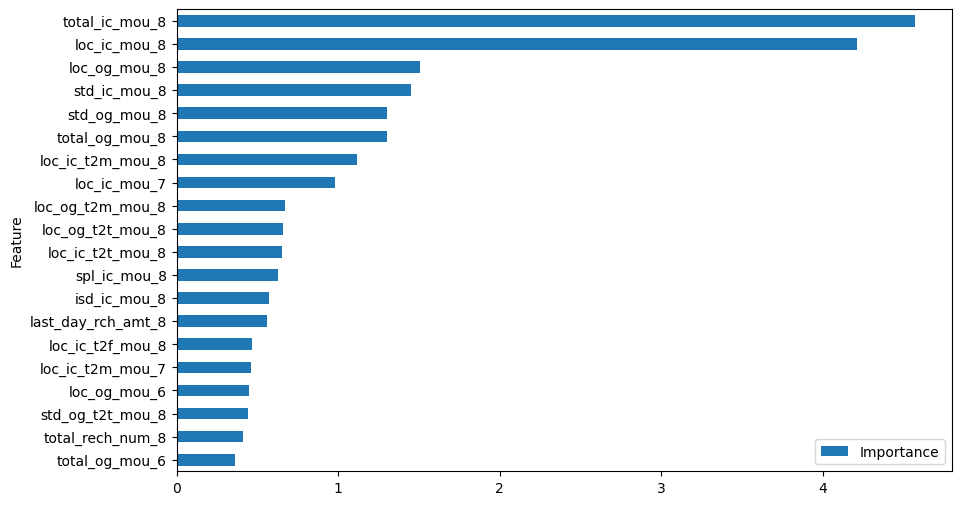

In [265]:

coefficients = pipe_lr['LR'].coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(20)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))


# Decision Tree

In [266]:
#dt_grid_search.fit(x_train, y_train)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('DT', DecisionTreeClassifier(random_state=1))])

In [267]:
# print("Decision Trees Model")
# print(dt_grid_search.score(x_test, y_test)*100)
# print("+"*100)
# print(dt_grid_search.best_params_)
# print(dt_grid_search.score(x_train, y_train)*100)

print("Decision Trees Model")
print("Train",pipe_dt.score(X_train, y_train)*100)
print("Test",pipe_dt.score(X_test, y_test)*100)
print("+"*150)


Decision Trees Model
Train 100.0
Test 90.73714285714286
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Random Forest

In [268]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=1))])

In [269]:
print("Random forest Model")
print("Train",pipe_rf.score(X_train, y_train)*100)
print("Test",pipe_rf.score(X_test, y_test)*100)
print("+"*100)
y_train_pred = pipe_rf.predict(X_train)
print(classification_report(y_train, y_train_pred))
print("+"*100)

y_test_pred = pipe_rf.predict(X_test)
print(classification_report(y_test, y_test_pred))



Random forest Model
Train 99.9942856054401
Test 94.14285714285714
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47150
         1.0       1.00      1.00      1.00      5349

    accuracy                           1.00     52499
   macro avg       1.00      1.00      1.00     52499
weighted avg       1.00      1.00      1.00     52499

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     15717
         1.0       0.78      0.59      0.67      1783

    accuracy                           0.94     17500
   macro avg       0.87      0.78      0.82     17500
weighted avg       0.94      0.94      0.94     17500



In [270]:
pipe_rf_with_pca.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('pca', IncrementalPCA(n_components=20)),
                ('RF', RandomForestClassifier(random_state=1))])

In [271]:
print("Random forest Model (with PCA)")
print("Train",pipe_rf_with_pca.score(X_train, y_train)*100)
print("Test",pipe_rf_with_pca.score(X_test, y_test)*100)
print("+"*100)
y_train_pred = pipe_rf_with_pca.predict(X_train)
print(classification_report(y_train, y_train_pred))
print("+"*100)

y_test_pred = pipe_rf_with_pca.predict(X_test)
print(classification_report(y_test, y_test_pred))



Random forest Model (with PCA)
Train 99.99809520181337
Test 91.72
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47150
         1.0       1.00      1.00      1.00      5349

    accuracy                           1.00     52499
   macro avg       1.00      1.00      1.00     52499
weighted avg       1.00      1.00      1.00     52499

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15717
         1.0       0.71      0.31      0.44      1783

    accuracy                           0.92     17500
   macro avg       0.82      0.65      0.70     17500
weighted avg       0.90      0.92      0.90     17500



With PCA, we are getting poor accuracy on the test set

So we will continue with the model which is built without PCA

# K-nearest Neighbour

In [272]:
pipe_knn.fit(X_train, y_train)

print("K nearest Neighbour Model")
print("Train",pipe_knn.score(X_train, y_train)*100)
print("Test",pipe_knn.score(X_test, y_test)*100)
print("+"*100)

K nearest Neighbour Model
Train 93.33701594316082
Test 91.24
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# XGB 

In [273]:
pipe_xgb.fit(X_train, y_train)

print("XGB Model")
print("Train",pipe_xgb.score(X_train, y_train)*100)
print("Test",pipe_xgb.score(X_test, y_test)*100)
print("+"*100)

XGB Model
Train 98.16567934627327
Test 94.10857142857142
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# TEST DATA

In [274]:
data_unseen=pd.read_csv("test.csv")

In [275]:
data_unseen=prepare_data(data_unseen)

In [276]:
data_unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,months_since_last_charge
0,69999.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,...,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00,0.0
1,70000.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,...,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00,0.0
2,70001.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,...,0.0,0.0,0.0,0.0,0.0,277.0,525.61,758.41,241.84,0.0
3,70002.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.00,0.00,0.00,0.0
4,70003.0,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,...,0.0,0.0,0.0,0.0,0.0,462.0,0.00,0.00,0.00,0.0


In [277]:
data_unseen['churn_probability'] = pipe_rf.predict(data_unseen.drop(['id'], axis =1 ))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- arpu_6
- arpu_7


In [330]:
data_unseen['churn_probability'].value_counts()

churn_probability
0.0    28694
1.0     1306
Name: count, dtype: int64

In [331]:
final_prediction = data_unseen[['id','churn_probability']]

In [332]:
final_prediction['churn_probability'] = final_prediction.churn_probability.apply(np.int64)
final_prediction['id'] = final_prediction.id.apply(np.int64)

In [333]:
final_prediction.to_csv('Ajay_V_M_Harish_Babu.csv',index=False)
final_prediction.head

<bound method NDFrame.head of           id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]>